# Construction of the datasets

It's important to know the data you're palying with to understand how the machine learning algorithms work!

### Import some libraries

In [1]:
# works with arrays
import numpy as np

# works with dataframe
import pandas as pd

# plot results
import matplotlib.pyplot as plt

## 1. Tux happiness

Designed to work on supervised learning - regression

### Dependent variable

We followed Tux during an entire year. Each day, we asked him if he had a good day, and we note that on our dataset.

His happiness is our <b>dependent variable</b> (sometimes called <b>variable of interest</b> in the literature)

First, we randomly generate happiness scores, between 0 and 5:
- Tux is sad <=> 0
- Tux is happy <=> 5 

In [2]:
tux_happiness = np.random.uniform(0, 5, 365)

### Independent variable

#### (a) Fish

We describe the number of fishes eaten by Tux each day (in kilogram).

We want the average to be around 2-3 kg.
https://seaworld.org/animals/all-about/penguins/diet-and-eating-habits/

The idea is; 
- If Tux is well fed, then he'll be happier :-)
- Otherwise, he'll be sad

But this number can't be negative!

In [3]:
fish = [max(0,
            np.random.uniform(tux_happiness[i]-np.random.uniform(0,3), 
                                tux_happiness[i]+np.random.uniform(0,3))
           ) 
        for i in range(len(tux_happiness))]

Little check (tux happiness should be centered around 2.5, so is fish) for the average number of fish eaten

In [4]:
np.mean(fish)

2.3651499911433795

Then look the relationship between fish and happiness

In [5]:
np.corrcoef(fish,tux_happiness)[0,1]

0.8052538280637714

Pretty high correlation

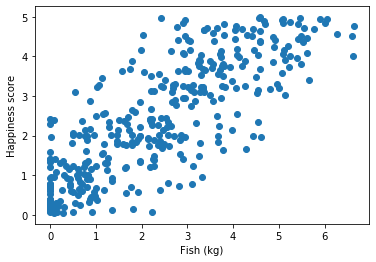

In [6]:
plt.scatter(fish, tux_happiness)
plt.ylabel("Happiness score")
plt.xlabel("Fish (kg)")
plt.show()

#### (b) Temperature

Tux always swims with his thermometer. So it's easy to get the average water temperature (in celsus degrees, sorry if you're american) in our dataset.

The idea is; 
- If the temperature is too high, the ice melt, and Tux lose his house, so he's sad
- If the temperature falls below 0°C, he's enjoying the weather!


In [7]:
temperature = [np.random.uniform(0, 10) if tux_happiness[i] < np.random.uniform(1.5,4) 
               else np.random.uniform(-15, tux_happiness[i]) for i in range(len(tux_happiness))]

Little check with average

In [8]:
np.mean(temperature)

0.40995350945548636

Pretty cold out there, brrrrr...

In [9]:
np.corrcoef(temperature, tux_happiness)[0,1]

-0.5885246187207666

Not so bad :-) could use Spearman instead of Pearson (Pearson = linear, Spearman = rank)

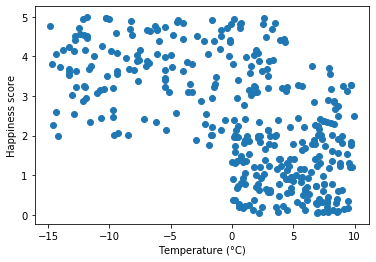

In [10]:
plt.scatter(temperature, tux_happiness)
plt.ylabel("Happiness score")
plt.xlabel("Temperature (°C)")
plt.show()

Not realistic, but ok, let's go with it!

Fish and temperature will be our <b>independant variables</b> (or <b>explaining variables</b> )

Let's store that in our dataset

In [11]:
dataset1 = pd.DataFrame({ "happy" : tux_happiness, "temp" : temperature, "fish" : fish})
dataset1.to_csv("happiness.csv")
dataset1.head()

,happy,temp,fish
0,0.484098,3.796804,0.977109
1,4.441049,-3.974861,5.420305
2,2.341838,2.217617,2.201627
3,3.456520,-5.435268,1.140884
4,3.846523,-3.710603,4.864311


## 2. Tux alimentation

Designed to work on feature selection

A feature is a variable (as fish defined in the previous dataset)

<b>CONTEXT</b>

Right now, Tux is a fish addict; he wants to reduce his fish consumption, i.e. select some species.

He could consult a nutritionist, but he has no money; you know, he's a pengouin.

Can we help Tux with machine learning?

### Dependent variable

His health is our <b>dependent variable</b>.

First, we randomly generate health scores, between 0 and 5:
- Tux feels bad <=> 0
- Tux is healthy <=> 5 

In [12]:
tux_health = np.random.uniform(0, 5, 365)

### Independent variable

We put two fishes, highly correlated to Tux's health, and a dozen of fishes following uniform distributions.

The goal in the future will be to retrieve these two fishes, and to identify them as important variables to keep in the predictive model.

In [13]:
fish_names = ["Blacktip Shark", "Dolphin", "Blackfin Tuna", "Black Drum", "Black Sea Bass", "Bluefish", 
              "Bluefin Tuna", "Blue Marlin","Blueline Tilefish", "Butterfish", "Cobia", "Croaker",  "Flounder",
              "Gag Grouper", "Gray Triggerfish", "Gray Trout","Hammerhead", "Hickory Shad"]

In [14]:
shark = tux_health + np.random.normal(0, 2, len(tux_health))
dolphin = tux_health + np.random.normal(0, 2, len(tux_health))

Yes, Tux is a strong pengouin eating sharks and dolphins. 

Even the pengouins go wild in this crazy world!

In [15]:
np.corrcoef(tux_health, shark)[0,1]

0.5656484493799101

In [16]:
np.corrcoef(tux_health, dolphin)[0,1]

0.609240306416474

OK! So dolphin and sharks are good for health!

Other fishes are uncorrelated with health, just uniform distributions.

In [17]:
dominos_fish = np.random.uniform(0, 1, len(tux_health))

In [18]:
np.corrcoef(tux_health, dominos_fish)[0,1]

-0.01400876713216797

And others aren't!

We save the dataset

In [19]:
arr = np.random.uniform(0, 1, len(tux_health)*len(fish_names)).reshape(len(tux_health),len(fish_names))
dataset2 = pd.DataFrame(arr)

dataset2.columns = fish_names

dataset2["Blacktip Shark"] = shark
dataset2["Dolphin"] = dolphin

dataset2.to_csv("fish.csv")
dataset2.head()

,Blacktip Shark,Dolphin,Blackfin Tuna,Black Drum,Black Sea Bass,Bluefish,Bluefin Tuna,Blue Marlin,Blueline Tilefish,Butterfish,Cobia,Croaker,Flounder,Gag Grouper,Gray Triggerfish,Gray Trout,Hammerhead,Hickory Shad
0,3.655346,3.704967,0.674357,0.026553,0.713705,0.016341,0.327152,0.778082,0.236149,0.223870,0.946561,0.540921,0.042221,0.047383,0.126725,0.279087,0.944975,0.885070
1,6.902597,6.406301,0.537382,0.899594,0.498472,0.771903,0.240013,0.862871,0.300716,0.944348,0.772177,0.893494,0.485124,0.158001,0.969294,0.628180,0.249613,0.163837
2,2.431709,0.829996,0.490373,0.340643,0.656026,0.549007,0.429828,0.090187,0.807905,0.661668,0.834329,0.733494,0.963782,0.500399,0.719362,0.531173,0.114040,0.701044
3,1.618988,1.528279,0.592189,0.195441,0.026389,0.469508,0.069975,0.919383,0.810837,0.657685,0.086509,0.299303,0.422317,0.972673,0.061636,0.854971,0.969045,0.842061
4,3.543373,4.228752,0.229758,0.659985,0.498104,0.915873,0.354963,0.266143,0.984567,0.561686,0.934253,0.566312,0.970406,0.685391,0.363798,0.945017,0.072747,0.797506
